In [1]:
from functions_sup import *

In [2]:
# import data
pm = pd.read_csv('/Users/I572269/Downloads/predictive maintenance/predictive_maintenance.csv',sep=',')

In [3]:
pm.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

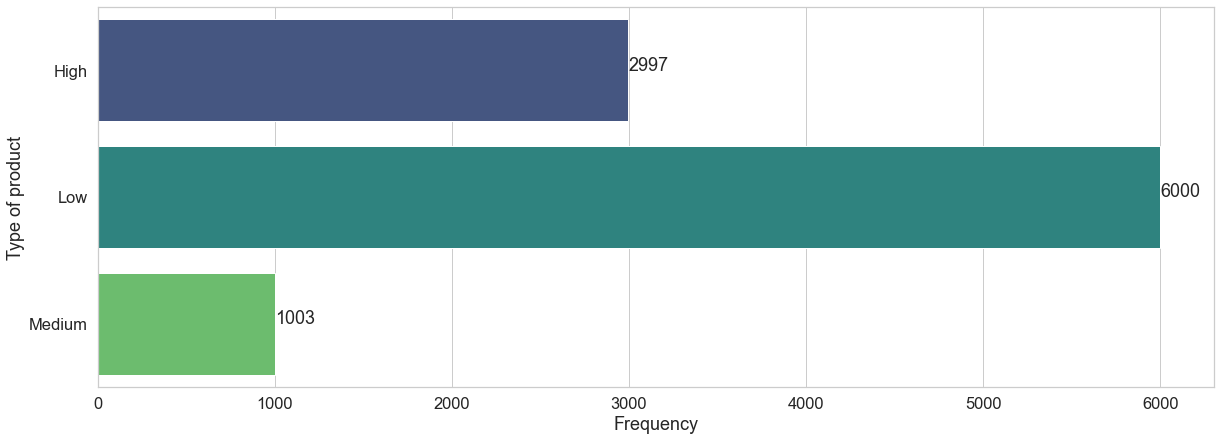

In [4]:
plt.figure(figsize=(20,7))
sns.set_theme(font_scale=1.5,style="whitegrid")
pl = sns.countplot(y=pm["Type"],palette="viridis")
plt.yticks([0,1,2], labels=['High','Low','Medium'])
pl.set(xlabel="Frequency")
pl.set(ylabel="Type of product")
for p in pl.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl.annotate(percentage, (x, y))
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/qualityproductPM.png')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No Failure'),
  Text(0, 1, 'Power Failure'),
  Text(0, 2, 'Tool Wear Failure'),
  Text(0, 3, 'Overstrain Failure'),
  Text(0, 4, 'Random Failures'),
  Text(0, 5, 'Heat Dissipation Failure')])

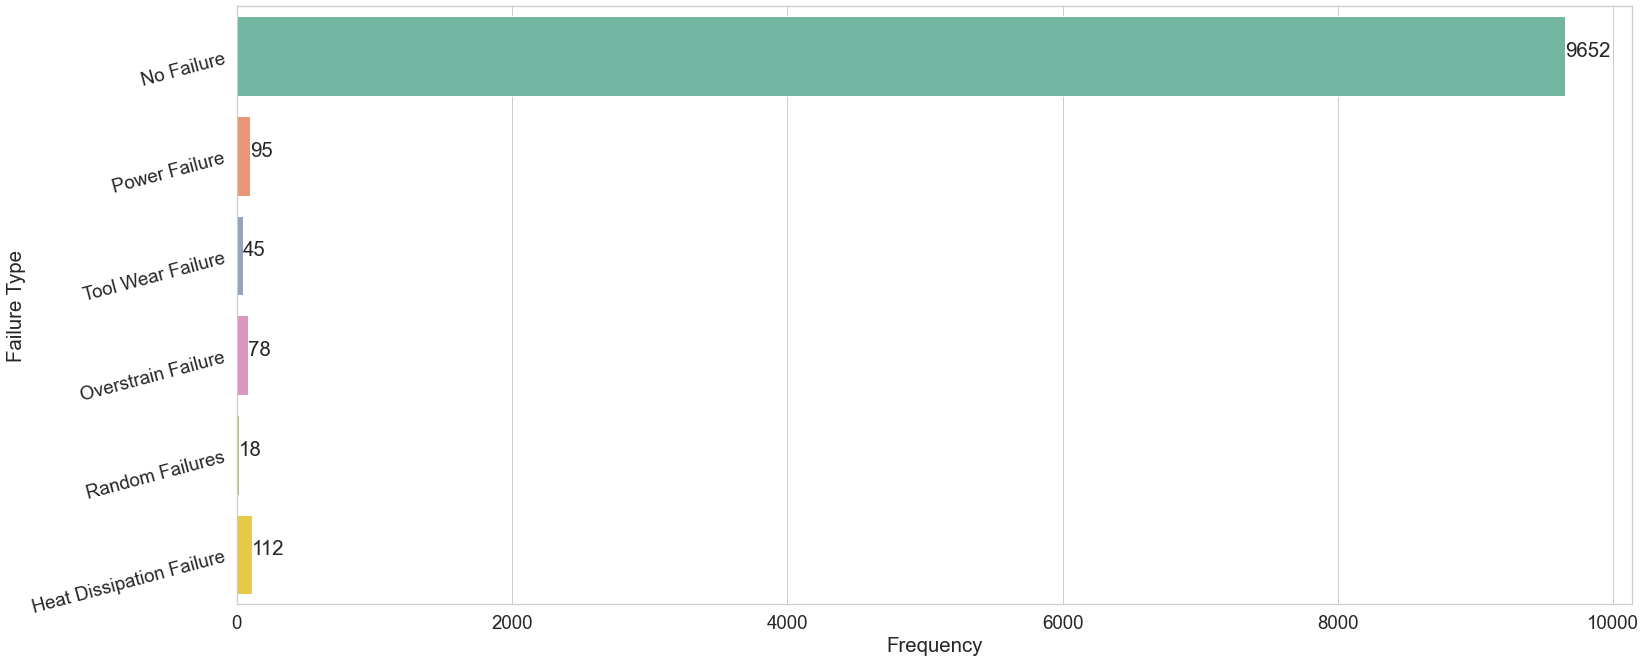

In [5]:
plt.figure(figsize=(25,11))
sns.set_theme(font_scale=1.7,style="whitegrid")
pl = sns.countplot(y=pm["Failure Type"],palette="Set2")
pl.set(xlabel="Frequency")
for p in pl.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl.annotate(percentage, (x, y))
plt.yticks(rotation=15)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/unbalancedPM.png')

In [4]:
# pre-process
pm=pre_process_PM(pm)

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Correlation Matrix')

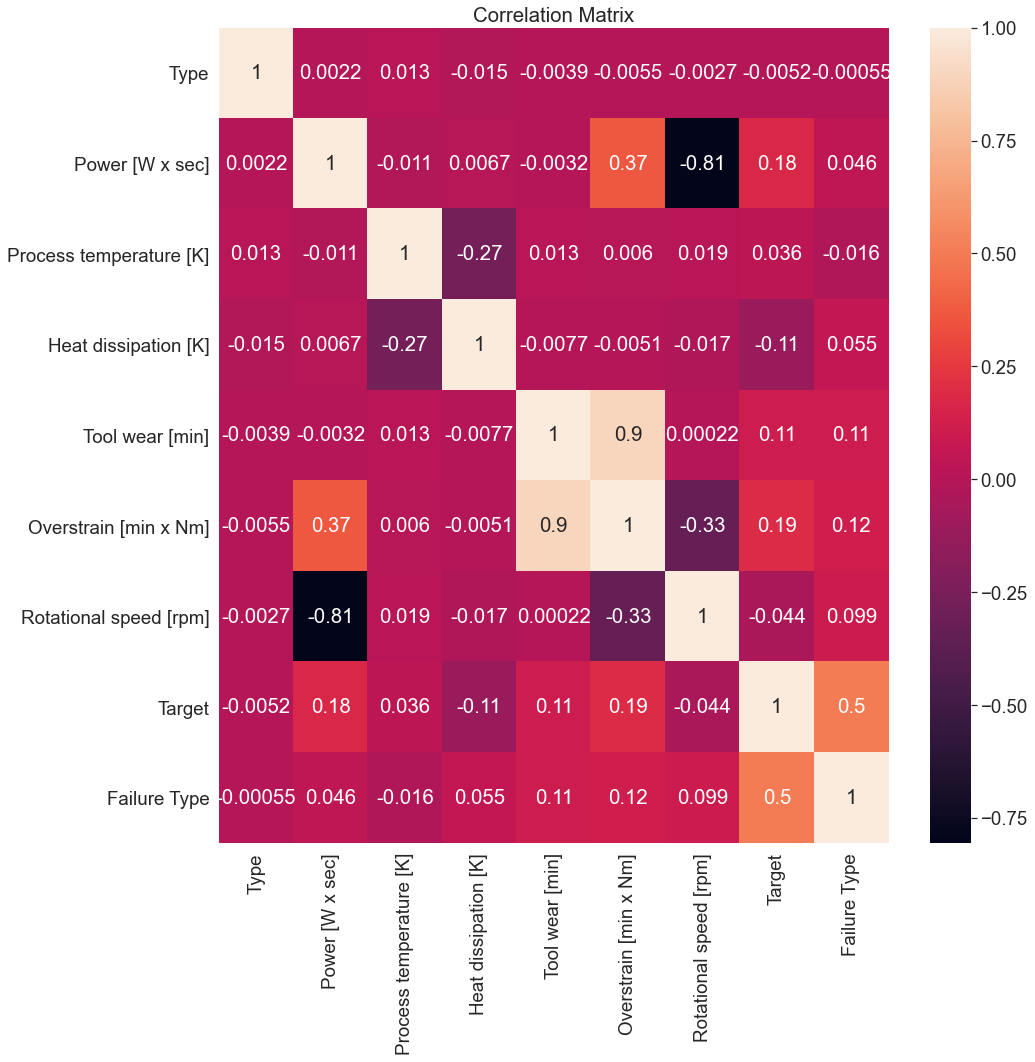

In [7]:
# data strategy
plt.figure(figsize=(15,15))
pl = sns.heatmap(pm.corr(), annot=True)
pl.set_title("Correlation Matrix")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/correlationPM.png') 

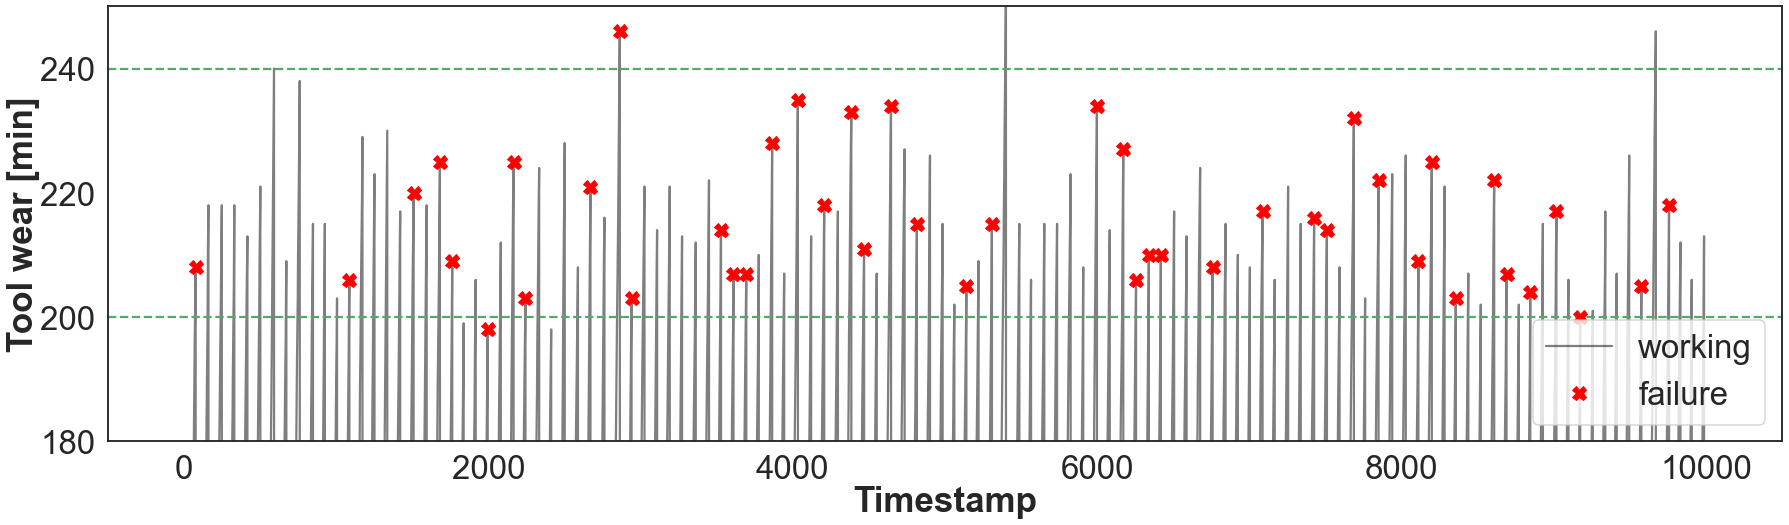

In [8]:
# visualization
TF=pm[pm['Failure Type']==4]
sns.set_theme(style="white")
sns.set_context('talk')
# Set the axes labels font size
plt.rc('axes', labelsize=35)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=33)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=33)
# Set the legend font size
plt.rc('legend', fontsize=33)
_ = plt.figure(figsize=(30,8))
_ = plt.plot(pm['Tool wear [min]'], color='black', label='working',alpha=0.5)
_ = plt.axhline(y=200, color='g', linestyle='--')
_ = plt.axhline(y=240, color='g', linestyle='--')
_ = plt.plot(TF['Tool wear [min]'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Tool wear [min]',fontweight='bold',labelpad=0)
_ = plt.ylim([180,250])
_ = plt.xlabel('Timestamp',fontweight='bold',labelpad=0)
_ =plt.legend(loc="lower right")
#plt.savefig('/Users/nicolaronzoni/Desktop/toolwearfailurePM.png') 

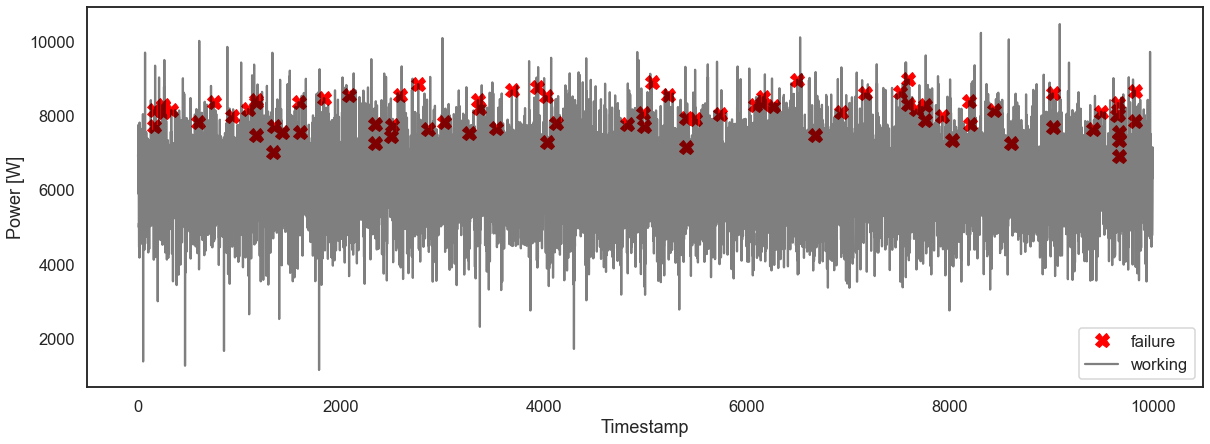

In [9]:
TF=pm[pm['Failure Type']==2]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(TF['Power [W x sec]'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.plot(pm['Power [W x sec]'], color='black',linestyle='-', label='working',alpha=0.5)
_ = plt.ylabel('Power [W]')
_ = plt.xlabel('Timestamp')
_ =plt.legend(loc="lower right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/powerfailurePM.png') 

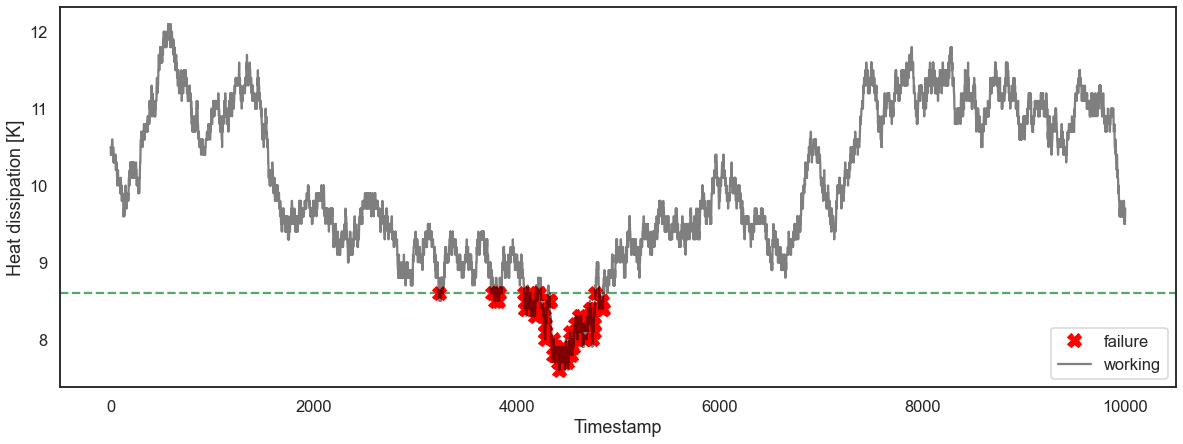

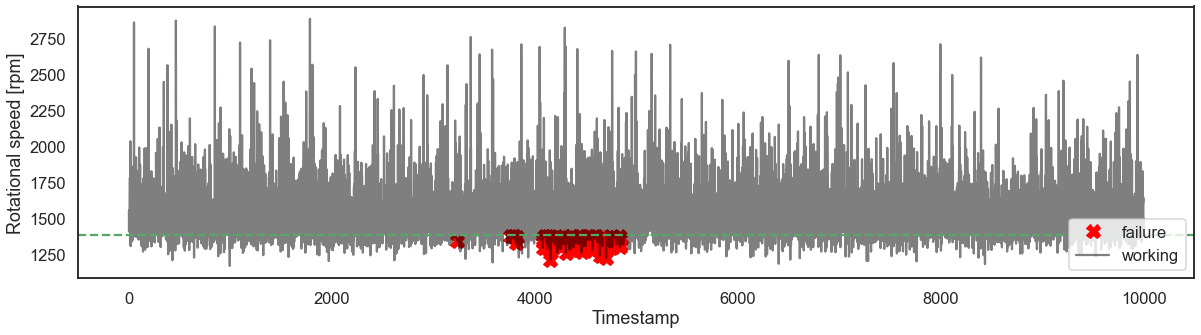

In [10]:
TF=pm[pm['Failure Type']==0]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.axhline(y=8.6, color='g', linestyle='--')
_ = plt.plot(TF['Heat dissipation [K]'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.plot(pm['Heat dissipation [K]'], color='black', label='working',alpha=0.5)
_ = plt.ylabel('Heat dissipation [K]')
_ = plt.xlabel('Timestamp')
_ =plt.legend(loc="lower right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/heatdissipationfailurePM1.png') 
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(TF['Rotational speed [rpm]'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.plot(pm['Rotational speed [rpm]'], color='black', label='working',alpha=0.5)
_ = plt.axhline(y=1380, color='g', linestyle='--')
_ = plt.ylabel('Rotational speed [rpm]')
_ = plt.xlabel('Timestamp')
_ =plt.legend(loc="lower right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/heatdissipationfailurePM2.png') 

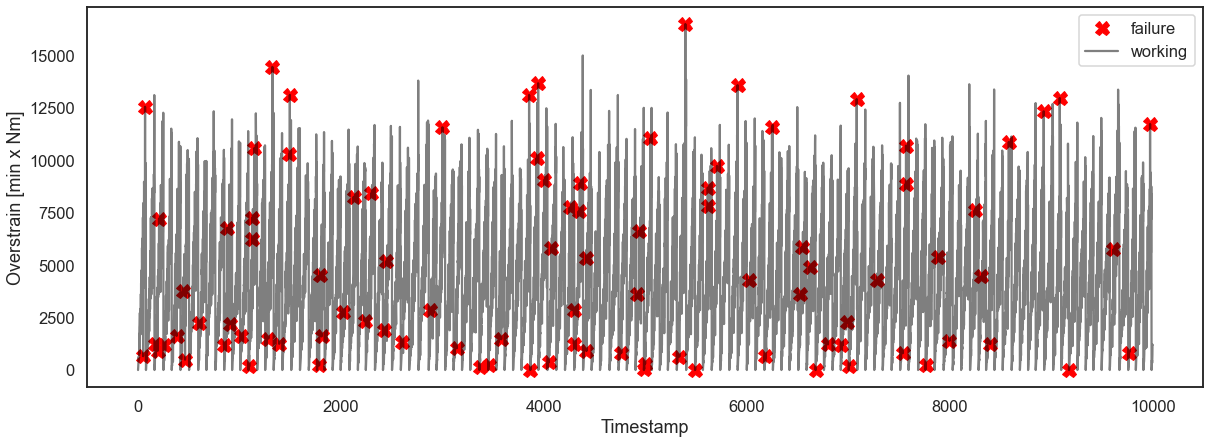

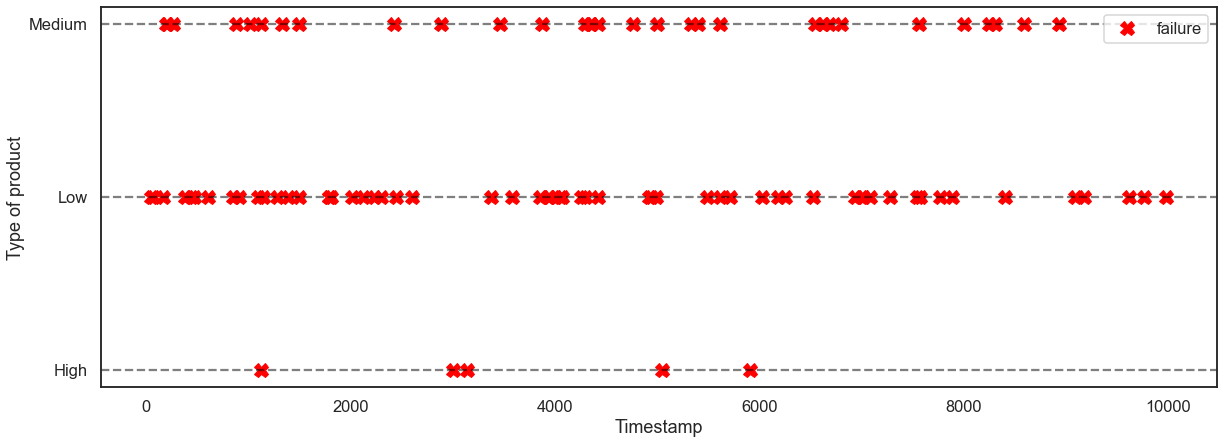

In [11]:
TF=pm[pm['Failure Type']==3]
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(TF['Overstrain [min x Nm]'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.plot(pm['Overstrain [min x Nm]'], color='black', label='working',alpha=0.5)
_ = plt.ylabel('Overstrain [min x Nm]')
_ = plt.xlabel('Timestamp')
_ =plt.legend(loc="upper right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/overstrainfailurePM1.png') 
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_ = plt.plot(TF['Type'], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Type of product')
_ = plt.xlabel('Timestamp')
_ = plt.axhline(y=0, color='black', linestyle='--',alpha=0.5)
_ = plt.axhline(y=1, color='black', linestyle='--',alpha=0.5)
_ = plt.axhline(y=2, color='black', linestyle='--',alpha=0.5)
_ = plt.yticks([0,1,2], labels=['High','Low','Medium'])
_ =plt.legend(loc="upper right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/overstrainfailurePM2.png') 

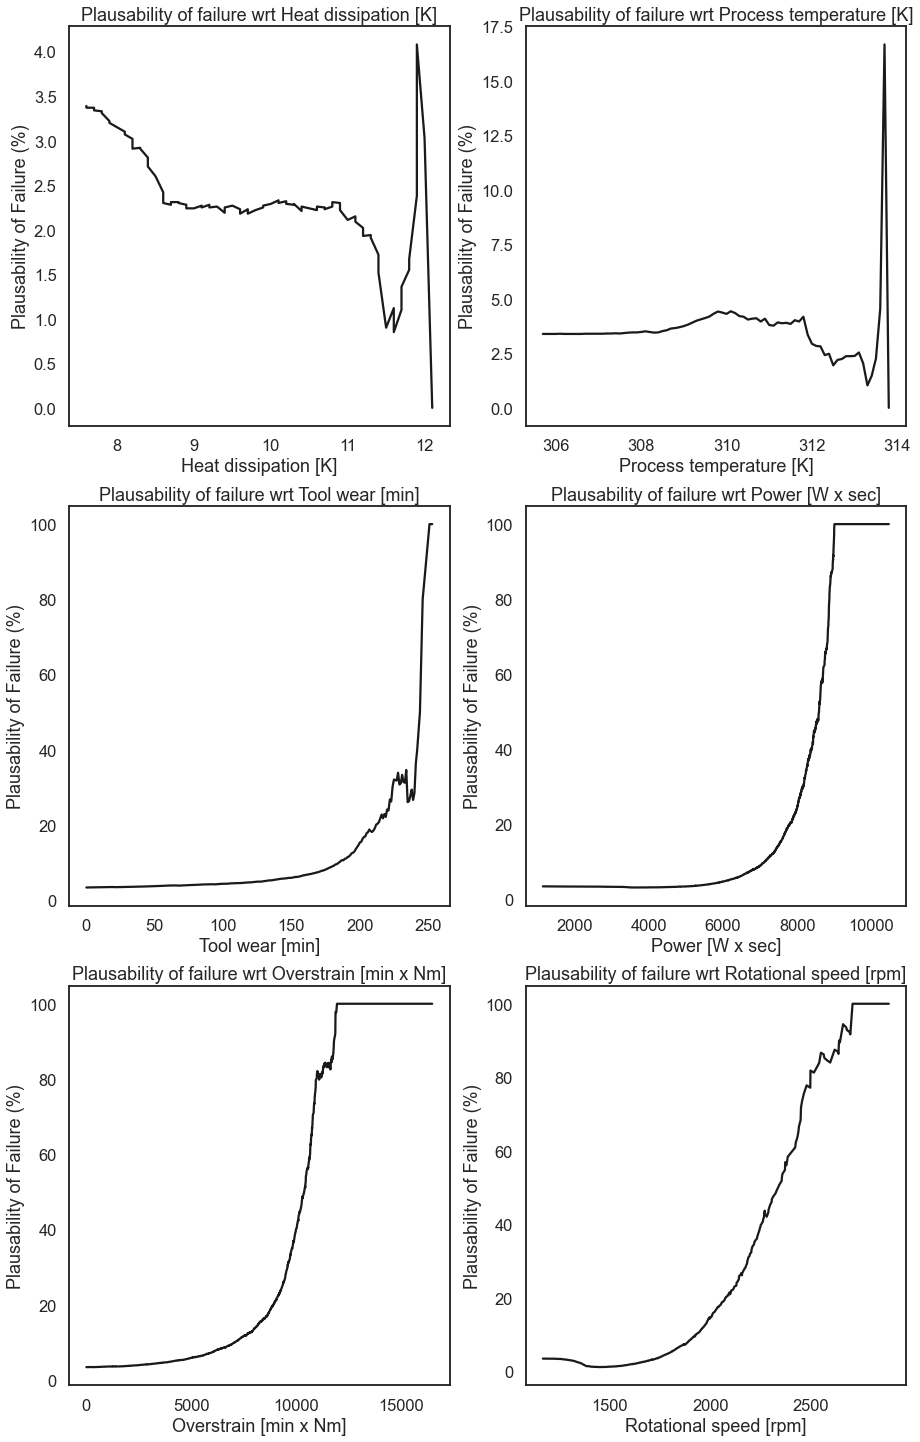

In [12]:
plt.figure(figsize=(15,25))
m=1
for i in ['Heat dissipation [K]','Process temperature [K]', 'Tool wear [min]', 'Power [W x sec]','Overstrain [min x Nm]','Rotational speed [rpm]'] :
    plt.subplot(3,2,m).set_title(label=("Plausability of failure wrt "+i))
    x,y = feat_prob(i,pm)
    plt.xlabel(i)
    plt.ylabel("Plausability of Failure (%)")
    sns.lineplot(y=y,x=x,color='k')
    m+=1
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/plausabilityoffailurePM.png') 


In [5]:
evaluation_rf(pm,'roc_auc_ovr')

|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9868   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9899   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  10       |  0.9904   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  18       |  0.9909   |  1.121    |  7.087    |  1.373    |  0.579    |  5.409    |  12.6     |  155.5    |
{'target': 0.9909037366382771, 'params': {'criterion': 1.1210100408992416, 'max_depth': 7.086724439463937, 'max_features': 1.3726214868258362, 'max_samples': 0.5790143521113588, 'min_sample_leaf': 5.409168727826245, 'min_sample_split': 12.598619615731335, 'n_estimators': 155.49249872010247}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  3        |  0.9907   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  11       |  0.9912   |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  17       |  0.9915   |  1.952    |  9.401    |  1.118    |  0.7942   |  7.585    |  12.2     |  93.0     |
|  18       |  0.9925   |  1.121    |  7.087    |  1.373    |  0.579    |  5.409    |  12.6     |  155.5    |
{'target': 0.9924702003483622, 'params': {'criterion': 1.1210100408992416, 'max_depth': 7.086724439463937, 'max_features': 1.3726214868258362, 'max_samples': 0.5790143521113588, 'min_sample_leaf': 5.409168727826245, 'min_sample_split': 12.598619615731335, 'n_estimators': 155.49249872010247}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9864   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9894   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  6        |  0.9901   |  0.4127   |  6.923    |  1.45     |  0.4645   |  6.911    |  9.228    |  140.9    |
|  10       |  0.9901   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  11       |  0.9906   |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  18       |  0.9911   |  1.121    |  7.087    |  1.373    |  0.579    |  5.409    |  12.6     |  155.5    |
|  25       |  0.9912   |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
{'target':

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9891   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9912   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  6        |  0.9912   |  0.4127   |  6.923    |  1.45     |  0.4645   |  6.911    |  9.228    |  140.9    |
|  10       |  0.9917   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  11       |  0.9927   |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  25       |  0.9927   |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
{'target': 0.9926803311491448, 'params': {'criterion': 1.5320684581859099, 'max_depth': 8.74465688071259, 'max_features'

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9902   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9907   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  6        |  0.9908   |  0.4127   |  6.923    |  1.45     |  0.4645   |  6.911    |  9.228    |  140.9    |
|  10       |  0.9909   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  25       |  0.991    |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
|  27       |  0.9911   |  1.677    |  6.515    |  0.1456   |  0.6758   |  6.476    |  8.806    |  194.9    |
|  30       |  0.9912   |  0.0      |  8.304    |  0.0      |  1.0      |  8.0      |  6.0      |  193.1    |
{'target':

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9882   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9904   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  8        |  0.9919   |  2.412    |  5.85     |  2.891    |  0.4753   |  5.275    |  6.164    |  71.33    |
{'target': 0.991927598175043, 'params': {'criterion': 2.4117072413632976, 'max_depth': 5.850224337624084, 'max_features': 2.890610086028755, 'max_samples': 0.475281175957289, 'min_sample_leaf': 5.275360503684697, 'min_sample_split': 6.164428176044198, 'n_estimators': 71.33092973122697}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9879   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9895   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  10       |  0.9904   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
{'target': 0.990350312456927, 'params': {'criterion': 0.4473435150504324, 'max_depth': 7.464105004544745, 'max_features': 1.4023355663546198, 'max_samples': 0.7914231378130863, 'min_sample_leaf': 6.675256234268346, 'min_sample_split': 10.412681772565863, 'n_estimators': 178.2832864846851}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.99     |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.992    |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  10       |  0.9928   |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  11       |  0.993    |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  17       |  0.9931   |  1.952    |  9.401    |  1.118    |  0.7942   |  7.585    |  12.2     |  93.0     |
|  25       |  0.9933   |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
{'target': 0.9933458430972593, 'params': {'criterion': 1.5320684581859099, 'max_depth': 8.74465688071259, 'max_features'

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9896   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  6        |  0.9913   |  0.4127   |  6.923    |  1.45     |  0.4645   |  6.911    |  9.228    |  140.9    |
|  10       |  0.992    |  0.4473   |  7.464    |  1.402    |  0.7914   |  6.675    |  10.41    |  178.3    |
|  15       |  0.9923   |  0.6294   |  8.417    |  0.1767   |  0.3774   |  4.829    |  15.72    |  238.6    |
{'target': 0.9922501851290576, 'params': {'criterion': 0.6293927449829084, 'max_depth': 8.416516617491483, 'max_features': 0.17673017287158926, 'max_samples': 0.3774009744225587, 'min_sample_leaf': 4.8294699748267425, 'min_sample_split': 15.721908287997573, 'n_estimators': 238.60836758923887}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  3        |  0.9898   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
{'target': 0.9897767153128181, 'params': {'criterion': 1.857516329008084, 'max_depth': 4.1940282416521475, 'max_features': 1.3940020155859696, 'max_samples': 0.20653097601095521, 'min_sample_leaf': 4.295830256572817, 'min_sample_split': 15.007741791606836, 'n_estimators': 216.44081161208865}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  72.157000  6.921970
recall     72.795000  9.868608
f1         71.953000  8.957656
time        8.295312  1.173632

In [6]:
evaluation_xgb(pm,'roc_auc_ovr')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9844   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9855   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9861   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  9        |  0.9877   |  0.2901   |  0.1445   |  0.8888   |  9.734    |  11.34    |  125.2    |
{'target': 0.9876682398952161, 'params': {'colsample_bytree': 0.2900878329831002, 'eta': 0.1445272840498541, 'gamma': 0.8887668253218063, 'max_depth': 9.734073808772589, 'min_child_weight': 11.335832675175903, 'n_estimators': 125.21730417686547}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9872   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9894   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9903   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.9903   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
{'target': 0.9902878153993093, 'params': {'colsample_bytree': 0.14147349874133713, 'eta': 0.1577752663039806, 'gamma': 1.1456511487163714, 'max_depth': 7.411633542176003, 'min_child_weight': 8.921488831212312, 'n_estimators': 247.93229046593845}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9846   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9874   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.988    |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.9882   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
{'target': 0.9882371711986414, 'params': {'colsample_bytree': 0.14147349874133713, 'eta': 0.1577752663039806, 'gamma': 1.1456511487163714, 'max_depth': 7.411633542176003, 'min_child_weight': 8.921488831212312, 'n_estimators': 247.93229046593845}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9881   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9899   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9914   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
{'target': 0.9913735143351108, 'params': {'colsample_bytree': 0.1637932807321409, 'eta': 0.15577774635140332, 'gamma': 1.1512250173586605, 'max_depth': 8.510755023362279, 'min_child_weight': 8.272616732164813, 'n_estimators': 245.12759087583325}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9852   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9882   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.989    |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.9892   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
{'target': 0.9891618297976276, 'params': {'colsample_bytree': 0.14147349874133713, 'eta': 0.1577752663039806, 'gamma': 1.1456511487163714, 'max_depth': 7.411633542176003, 'min_child_weight': 8.921488831212312, 'n_estimators': 247.93229046593845}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9848   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9873   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  7        |  0.9877   |  0.2231   |  0.1188   |  0.843    |  7.823    |  10.58    |  140.9    |
|  8        |  0.9893   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.9894   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
|  29       |  0.9896   |  0.3      |  0.144    |  1.2      |  4.967    |  8.0      |  129.3    |
{'target': 0.9896317510896283, 'params': {'colsample_bytree': 0.3, 'eta': 0.14404113154052522, 'gamma': 1.2, 'max_depth': 4.966697544315182, 'min_child_weight': 8.0, 'n_estimators': 129.25263415964392}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9842   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.987    |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9874   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
{'target': 0.9874045077294401, 'params': {'colsample_bytree': 0.1637932807321409, 'eta': 0.15577774635140332, 'gamma': 1.1512250173586605, 'max_depth': 8.510755023362279, 'min_child_weight': 8.272616732164813, 'n_estimators': 245.12759087583325}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9896   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9912   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9915   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  9        |  0.9919   |  0.2901   |  0.1445   |  0.8888   |  9.734    |  11.34    |  125.2    |
|  26       |  0.992    |  0.2863   |  0.1549   |  1.128    |  10.0     |  11.07    |  128.3    |
|  29       |  0.9923   |  0.3      |  0.16     |  0.9244   |  8.197    |  8.604    |  128.2    |
{'target': 0.9922824192904443, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 0.9243549546702744, 'max_depth': 8.197345939732413, 'min_child_weight': 8.603664995974805, 'n_estimators': 128.15877440681768}}

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9881   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9906   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
{'target': 0.9906498670442934, 'params': {'colsample_bytree': 0.11479151282864085, 'eta': 0.1520619343328547, 'gamma': 1.076377536287777, 'max_depth': 8.72455718979425, 'min_child_weight': 14.521659659623525, 'n_estimators': 254.26333145543876}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9844   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  4        |  0.9866   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.9875   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  30       |  0.9876   |  0.2866   |  0.1513   |  0.8594   |  9.08     |  8.028    |  250.0    |
{'target': 0.9876419117609256, 'params': {'colsample_bytree': 0.28660602665407653, 'eta': 0.15125864296659933, 'gamma': 0.8594470923162201, 'max_depth': 9.079537766196285, 'min_child_weight': 8.027537290872381, 'n_estimators': 249.99316280962813}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  74.061000  1.635512
recall     74.708000  1.891641
f1         74.264000  1.544209
time       15.389062  3.362151

In [7]:
evaluation_ada(pm,'roc_auc_ovr')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  8        |  0.9527   |  0.1297   |  116.7    |
{'learning_rate': 0.12969943355205577, 'n_estimators': 116}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.9367   |  0.1149   |  211.7    |
|  3        |  0.9393   |  0.1036   |  92.64    |
|  5        |  0.9475   |  0.09909  |  128.8    |
|  23       |  0.9481   |  0.136    |  100.7    |
{'learning_rate': 0.13601592076203473, 'n_estimators': 100}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  22       |  0.9304   |  0.1233   |  96.47    |
{'learning_rate': 0.12333395679206861, 'n_estimators': 96}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  4        |  0.9239   |  0.0818   |  144.7    |
|  5        |  0.9244   |  0.09909  |  128.8    |
|  6        |  0.9344   |  0.1593   |  109.6    |
|  18       |  0.9362   |  0.1599   |  90.5     |
{'learning_rate': 0.15987789949517195, 'n_estimators': 90}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.9584   |  0.1149   |  211.7    |
|  3        |  0.9685   |  0.1036   |  92.64    |
|  9        |  0.9686   |  0.1173   |  86.73    |
|  24       |  0.97     |  0.08639  |  92.63    |
{'learning_rate': 0.08638907514341806, 'n_estimators': 92}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  3        |  0.9499   |  0.1036   |  92.64    |
|  4        |  0.953    |  0.0818   |  144.7    |
|  5        |  0.9611   |  0.09909  |  128.8    |
{'learning_rate': 0.09909457129971569, 'n_estimators': 128}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  4        |  0.9285   |  0.0818   |  144.7    |
|  14       |  0.9295   |  0.1137   |  69.27    |
|  15       |  0.9306   |  0.1163   |  84.22    |
{'learning_rate': 0.11633093145267759, 'n_estimators': 84}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  13       |  0.9743   |  0.1262   |  220.2    |
|  19       |  0.9761   |  0.1292   |  157.1    |
{'learning_rate': 0.1292332549974498, 'n_estimators': 157}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  3        |  0.9387   |  0.1036   |  92.64    |
|  7        |  0.9393   |  0.0865   |  192.6    |
|  8        |  0.9416   |  0.1297   |  116.7    |
{'learning_rate': 0.12969943355205577, 'n_estimators': 116}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  3        |  0.9319   |  0.1036   |  92.64    |
|  8        |  0.9325   |  0.1297   |  116.7    |
|  14       |  0.933    |  0.1137   |  69.27    |
{'learning_rate': 0.1137054301919375, 'n_estimators': 69}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  75.077000  1.971362
recall     67.586000  4.005622
f1         70.079000  2.805330
time        2.917187  0.515233

In [8]:
evaluation_gb(pm,'roc_auc_ovr')

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9417   |  0.1136   |  3.909    |  0.8675   |  7.963    |  8.377    |  79.59    |  0.9339   |
|  5        |  0.9584   |  0.1163   |  2.843    |  0.9634   |  6.791    |  11.65    |  116.7    |  0.9997   |
|  6        |  0.9742   |  0.09104  |  6.923    |  0.897    |  5.62     |  13.28    |  126.0    |  0.8801   |
|  9        |  0.9821   |  0.08425  |  3.024    |  0.8067   |  4.906    |  11.44    |  98.3     |  0.8359   |
{'learning_rate': 0.0842471720355992, 'max_depth': 3, 'max_features': 0.806676631891451, 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 98, 'subsample': 0.8358689567732067}
|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
----------------------------------------

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  76.725000  1.558833
recall     77.501000  0.797405
f1         77.057000  0.904348
time        7.167187  2.280454

In [9]:
evaluation_nn(pm,'roc_auc_ovr')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  6        |  0.9824   |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  10.9     |  0.09982  |  0.2242   |
|  16       |  0.9839   |  2.878    |  0.006612 |  24.71    |  1.388    |  0.7933   |  1.09e+06 |  0.8183   |  12.79    |  2.453    |  0.1958   |
{'activation': 'tanh', 'momentum': 0.8182638736220813, 'validation_fraction': 0.19583693219122583, 'batch_size': 24, 'learning_rate': 'constant', 'solver': 'adam', 'early_stopping': False, 'max_iter': 1090183, 'alpha': 0.00661231135416577, 'hidden_layer_sizes': (12,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  2        |  0.9885   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  10.83    |  0.2211   |  0.8918   |
{'activation': 'relu', 'momentum': 0.46622140989497307, 'validation_fraction': 0.8917664373690769, 'batch_size': 25, 'learning_rate': 'invscaling', 'solver': 'lbfgs', 'early_stopping': False, 'max_iter': 1027425, 'alpha': 0.0023848872744612276, 'hidden_layer_sizes': (10,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
----------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  2        |  0.9875   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  10.83    |  0.2211   |  0.8918   |
|  6        |  0.9892   |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  10.9     |  0.09982  |  0.2242   |
{'activation': 'logistic', 'momentum': 0.05308965044499003, 'validation_fraction': 0.22415688147553967, 'batch_size': 62, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1003818, 'alpha': 0.00966792466870477, 'hidden_layer_sizes': (10,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida..

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  2        |  0.9892   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  10.83    |  0.2211   |  0.8918   |
{'activation': 'relu', 'momentum': 0.46622140989497307, 'validation_fraction': 0.8917664373690769, 'batch_size': 25, 'learning_rate': 'invscaling', 'solver': 'lbfgs', 'early_stopping': False, 'max_iter': 1027425, 'alpha': 0.0023848872744612276, 'hidden_layer_sizes': (10,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  2        |  0.9726   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  10.83    |  0.2211   |  0.8918   |
|  6        |  0.9827   |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  10.9     |  0.09982  |  0.2242   |
|  9        |  0.9828   |  0.2767   |  0.003654 |  56.49    |  0.9394   |  0.5367   |  1.018e+0 |  0.9491   |  14.59    |  0.4036   |  0.9185   |
|  11       |  0.983    |  0.2358   |  0.003089 |  39.23    |  1.935    |  2.719    |  1.068e+0 |  0.1152   |  16.71    |  0.2742   |  0.6235   |
{'activation': 'identity', 'momentum': 0.11518610390153883, 'validation_fraction': 0.623498501993659, 'batch_size': 39, 'lea

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0          1
precision  69.401   5.907049
recall     61.680  13.143395
f1         64.189  10.572284
time        8.475   5.081803

In [10]:
evaluation_rf(pm,'balanced_accuracy')

|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7547   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7594   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7866   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7865616807283475, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7375   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7559   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7734   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7734072734072733, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7511   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7658   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7734   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7733505865172531, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.4876   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  4        |  0.7574   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  8        |  0.7604   |  2.412    |  5.85     |  2.891    |  0.4753   |  5.275    |  6.164    |  71.33    |
|  23       |  0.7638   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7638388973388974, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7592   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7658   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7709   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7709415239415239, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7491   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7551   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7602   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7602282610615944, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7444   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7483   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  11       |  0.7513   |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  23       |  0.769    |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.769012772846106, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7416   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7692   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.777    |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7769870454870456, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7322   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7598   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7599   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7598797092130426, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  4        |  0.7324   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  7        |  0.7515   |  0.9537   |  9.578    |  2.747    |  0.8325   |  4.136    |  15.43    |  246.5    |
|  23       |  0.7592   |  0.7933   |  9.215    |  2.447    |  0.4593   |  7.281    |  7.978    |  164.3    |
{'target': 0.7591710845044178, 'params': {'criterion': 0.7932656681718104, 'max_depth': 9.214706891750417, 'max_features': 2.4466089821300234, 'max_samples': 0.4593098757487961, 'min_sample_leaf': 7.281141695998654, 'min_sample_split': 7.978150830214402, 'n_estimators': 164.32481346066237}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  72.685000  1.650497
recall     77.855000  1.458197
f1         74.780000  1.150613
time        5.092187  0.392285

In [11]:
evaluation_xgb(pm,'balanced_accuracy')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4682   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5264   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6615   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7345   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  9        |  0.738    |  0.2901   |  0.1445   |  0.8888   |  9.734    |  11.34    |  125.2    |
|  27       |  0.7436   |  0.3      |  0.16     |  1.2      |  10.0     |  8.524    |  160.1    |
{'target': 0.7436278359611693, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 1.2, 'max_depth': 10.0, 'min_child_weight': 8.523757310972726, 'n_estimators': 160.0885452900264}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4475   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.4818   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.656    |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7375   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  28       |  0.7475   |  0.3      |  0.16     |  1.2      |  10.0     |  8.0      |  162.2    |
{'target': 0.7475032568365902, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 1.2, 'max_depth': 10.0, 'min_child_weight': 8.0, 'n_estimators': 162.24611700492397}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4812   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5054   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6921   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7589   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
{'target': 0.758898870732204, 'params': {'colsample_bytree': 0.1637932807321409, 'eta': 0.15577774635140332, 'gamma': 1.1512250173586605, 'max_depth': 8.510755023362279, 'min_child_weight': 8.272616732164813, 'n_estimators': 245.12759087583325}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4879   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5104   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6871   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7528   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  9        |  0.7553   |  0.2901   |  0.1445   |  0.8888   |  9.734    |  11.34    |  125.2    |
|  27       |  0.7689   |  0.3      |  0.16     |  1.2      |  10.0     |  9.435    |  161.5    |
{'target': 0.7688545430212097, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 1.2, 'max_depth': 10.0, 'min_child_weight': 9.43546202960127, 'n_estimators': 161.4839558933084}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4922   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5056   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6862   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7368   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.7407   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
|  27       |  0.7544   |  0.2894   |  0.1597   |  1.11     |  9.882    |  8.617    |  254.5    |
{'target': 0.7543826058826058, 'params': {'colsample_bytree': 0.2893614951154515, 'eta': 0.15973572378753276, 'gamma': 1.1101945600516236, 'max_depth': 9.882014917422932, 'min_child_weight': 8.616960491158245, 'n_est

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.5022   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5078   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6737   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7289   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
{'target': 0.7288780733780733, 'params': {'colsample_bytree': 0.1637932807321409, 'eta': 0.15577774635140332, 'gamma': 1.1512250173586605, 'max_depth': 8.510755023362279, 'min_child_weight': 8.272616732164813, 'n_estimators': 245.12759087583325}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4733   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5003   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6803   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7455   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.7486   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
{'target': 0.7485767414100748, 'params': {'colsample_bytree': 0.14147349874133713, 'eta': 0.1577752663039806, 'gamma': 1.1456511487163714, 'max_depth': 7.411633542176003, 'min_child_weight': 8.921488831212312, 'n_estimators': 247.93229046593845}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4559   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.4753   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6558   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7257   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  26       |  0.7322   |  0.3      |  0.16     |  1.2      |  10.0     |  11.66    |  130.0    |
{'target': 0.7321500578167244, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 1.2, 'max_depth': 10.0, 'min_child_weight': 11.65570826901278, 'n_estimators': 129.95831884785295}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4697   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5011   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6662   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7418   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  28       |  0.7455   |  0.3      |  0.16     |  0.8376   |  10.0     |  8.0      |  162.3    |
{'target': 0.7454735388068722, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 0.837641243844371, 'max_depth': 10.0, 'min_child_weight': 8.0, 'n_estimators': 162.32457566483305}}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.4665   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.5086   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.6827   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  8        |  0.7387   |  0.1638   |  0.1558   |  1.151    |  8.511    |  8.273    |  245.1    |
|  18       |  0.7413   |  0.1415   |  0.1578   |  1.146    |  7.412    |  8.921    |  247.9    |
|  26       |  0.7452   |  0.3      |  0.16     |  1.2      |  10.0     |  8.933    |  129.7    |
|  29       |  0.7587   |  0.3      |  0.16     |  1.2      |  3.613    |  8.0      |  164.4    |
{'target': 0.7587142318808986, 'params': {'colsample_bytree': 0.3, 'eta': 0.16, 'gamma': 1.2, 'max_depth': 3.612993869

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0         1
precision  74.958000  1.919900
recall     75.306000  2.484410
f1         75.028000  1.773959
time       14.309375  2.521875

In [12]:
evaluation_gb(pm,'balanced_accuracy')

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.7403   |  0.1136   |  3.909    |  0.8675   |  7.963    |  8.377    |  79.59    |  0.9339   |
|  5        |  0.7592   |  0.1163   |  2.843    |  0.9634   |  6.791    |  11.65    |  116.7    |  0.9997   |
|  6        |  0.7685   |  0.09104  |  6.923    |  0.897    |  5.62     |  13.28    |  126.0    |  0.8801   |
|  25       |  0.773    |  0.09539  |  3.374    |  0.9211   |  7.613    |  9.756    |  197.9    |  0.8386   |
{'learning_rate': 0.0953874221360771, 'max_depth': 3, 'max_features': 0.9210932595710359, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 197, 'subsample': 0.8386077888730856}
|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
---------------------------------------

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.772    |  0.1136   |  3.909    |  0.8675   |  7.963    |  8.377    |  79.59    |  0.9339   |
|  6        |  0.7818   |  0.09104  |  6.923    |  0.897    |  5.62     |  13.28    |  126.0    |  0.8801   |
{'learning_rate': 0.09104336424447487, 'max_depth': 6, 'max_features': 0.8970072601676865, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 125, 'subsample': 0.880109109983357}
|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  5        |  0.7684   |  0.1163   |  2.843    |  0.9634   |  6.791    |  11.65    |  116.7    |  0.9997   |
|  6        |  0.7809   |  0.09104  | 

0         1
precision  76.569000  1.236666
recall     77.662000  1.254793
f1         77.076000  1.048853
time       15.482812  5.439477

In [13]:
evaluation_ada(pm,'balanced_accuracy')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.6384   |  0.1149   |  211.7    |
|  4        |  0.6394   |  0.0818   |  144.7    |
|  15       |  0.6424   |  0.1163   |  84.22    |
|  19       |  0.6432   |  0.1292   |  157.1    |
{'learning_rate': 0.1292332549974498, 'n_estimators': 157}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  7        |  0.6239   |  0.0865   |  192.6    |
|  11       |  0.6604   |  0.1435   |  225.4    |
|  12       |  0.6717   |  0.1452   |  254.3    |
{'learning_rate': 0.14521659659623526, 'n_estimators': 254}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.6233   |  0.1149   |  211.7    |
|  3        |  0.6266   |  0.1036   |  92.64    |
|  4        |  0.6315   |  0.0818   |  144.7    |
|  11       |  0.6469   |  0.1435   |  225.4    |
|  12       |  0.6491   |  0.14

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  13       |  0.6672   |  0.1262   |  220.2    |
{'learning_rate': 0.12618190636861434, 'n_estimators': 220}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  3        |  0.6641   |  0.1036   |  92.64    |
|  5        |  0.6706   |  0.09909  |  128.8    |
|  7        |  0.6851   |  0.0865   |  192.6    |
{'learning_rate': 0.08649541275609693, 'n_estimators': 192}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.6403   |  0.1149   |  211.7    |
|  11       |  0.6522   |  0.1435   |  225.4    |
|  12       |  0.6658   |  0.1452   |  254.3    |
|  25       |  0.6698   |  0.1505   |  254.3    |
{'learning_rate': 0.150470651785023, 'n_estimators': 254}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.6529 

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.5969   |  0.1149   |  211.7    |
|  3        |  0.6157   |  0.1036   |  92.64    |
|  6        |  0.653    |  0.1593   |  109.6    |
|  12       |  0.6722   |  0.1452   |  254.3    |
{'learning_rate': 0.14521659659623526, 'n_estimators': 254}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  5        |  0.6849   |  0.09909  |  128.8    |
|  11       |  0.703    |  0.1435   |  225.4    |
|  12       |  0.7189   |  0.1452   |  254.3    |
{'learning_rate': 0.14521659659623526, 'n_estimators': 254}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.6374   |  0.1149   |  211.7    |
|  5        |  0.6551   |  0.09909  |  128.8    |
|  7        |  0.6607   |  0.0865   |  192.6    |
|  10       |  0.6717   |  0.08592  |  236.9    |
{'learning_rate': 0.08591660513145634, 'n_estimators': 236}


0         1
precision  75.369000  5.052961
recall     68.453000  4.420649
f1         69.441000  5.660109
time        3.107813  0.856591

In [14]:
evaluation_nn(pm,'balanced_accuracy')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
{'activation': 'tanh', 'momentum': 0.022478324544161765, 'validation_fraction': 0.33427962996990446, 'batch_size': 64, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': False, 'max_iter': 1014916, 'alpha': 0.001699006845912908, 'hidden_layer_sizes': (12,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  6        |  0.6868   |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  10.9     |  0.09982  |  0.2242  

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  6        |  0.704    |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  10.9     |  0.09982  |  0.2242   |
{'activation': 'logistic', 'momentum': 0.05308965044499003, 'validation_fraction': 0.22415688147553967, 'batch_size': 62, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1003818, 'alpha': 0.00966792466870477, 'hidden_layer_sizes': (10,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
----------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0          1
precision  72.848000   1.999176
recall     72.808000   1.948930
f1         72.705000   1.736377
time       22.759375  14.719274

In [15]:
stop

NameError: name 'stop' is not defined

In [ ]:
# divide train and test 
split=split_training_testing(pm,0.33)

In [ ]:
# gradient boosting classifier 
# acquisition function : 'ucb' ,'ei', 'poi'
params_gb=grid_gbm_cv(split[2],split[4],'micro','poi')

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.3432   |  0.616    |  3.353    |  0.8872   |  133.8    |  0.8591   |
|  2        |  0.6569   |  0.1577   |  2.18     |  0.884    |  96.71    |  0.8675   |
|  3        |  0.3098   |  0.9908   |  3.902    |  0.8162   |  126.9    |  0.9242   |
|  4        |  0.63     |  0.2815   |  5.73     |  0.8237   |  85.18    |  0.9802   |
|  5        |  0.7317   |  0.796    |  8.725    |  0.963    |  149.4    |  0.9155   |
|  6        |  0.2575   |  0.8156   |  5.371    |  0.8055   |  111.8    |  0.8211   |
|  7        |  0.5349   |  0.819    |  7.582    |  0.9131   |  99.2     |  0.9997   |
|  8        |  0.7423   |  0.1467   |  6.923    |  0.897    |  108.4    |  0.9456   |
|  9        |  0.619    |  0.3296   |  5.204    |  0.8638   |  146.3    |  0.9837   |
|  10       |  0.2735   |  0.8157   |  2.273    |  0.9

In [ ]:
classifier = GradientBoostingClassifier(random_state=123, **params_gb)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# performance micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  99.03 %
Test Recall (Failure Type)         :  99.03 %
Test F1-Score (Failure Type) :  99.03 %
Test Balanced Accuracy Score (Failure Type): 78.05 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  79.36 %
Test Recall (Failure Type)         :  78.05 %
Test F1-Score (Failure Type) :  78.34 %
Test Balanced Accuracy Score (Failure Type): 78.05 %
()


In [ ]:
# Performance Machine status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  92.0 %
Test Recall (Machine Status)         :  80.0 %
Test F1-score (Machine Status) :  85.58 %
()


()

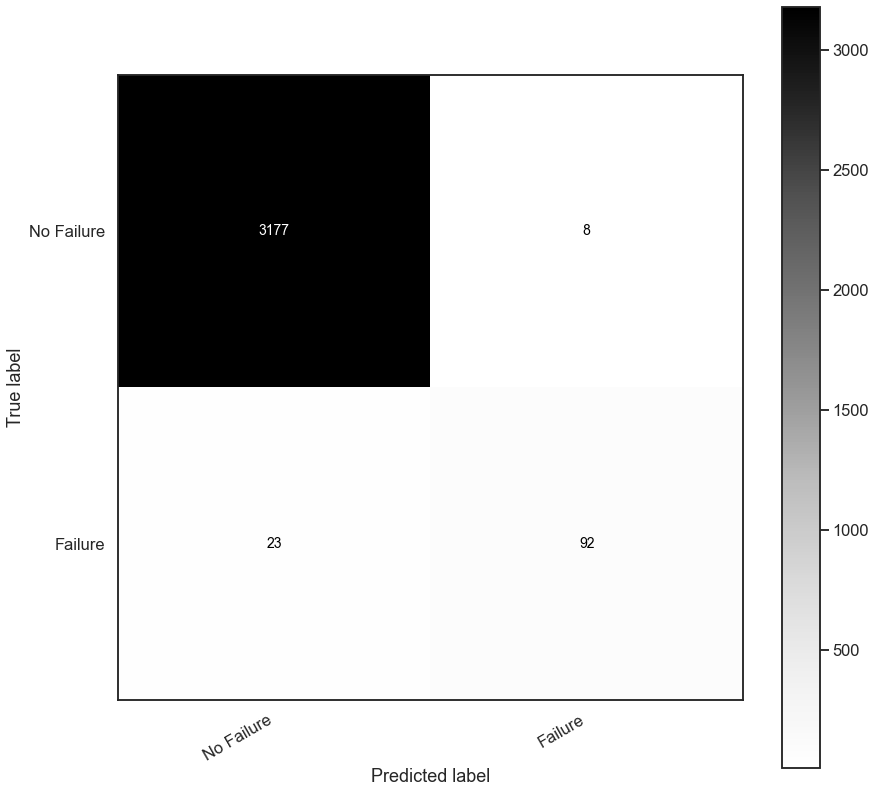

In [ ]:
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/gradientboostmachinestatusPM.png') 

()

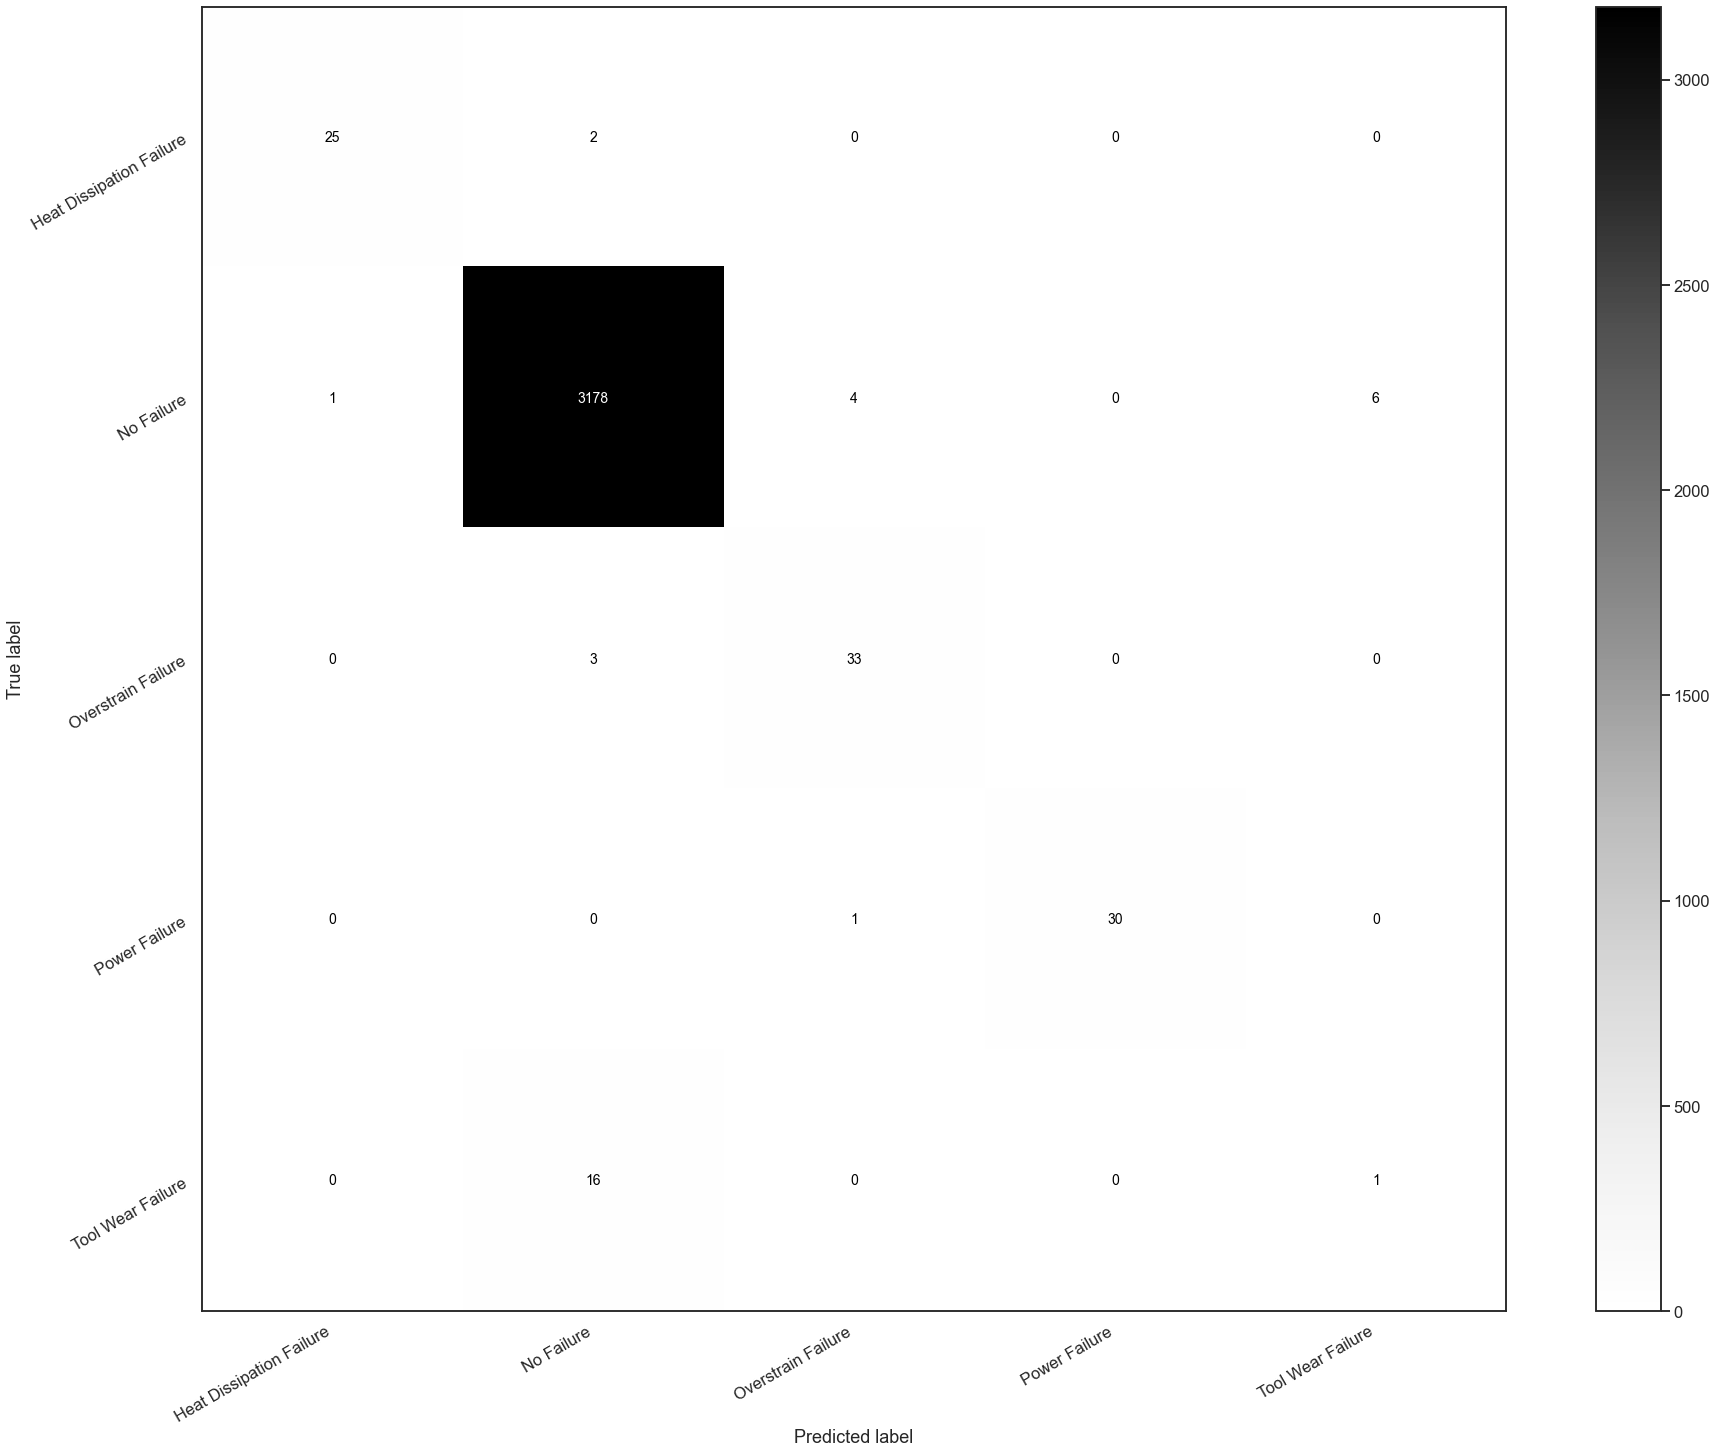

In [ ]:
confusion_failure_type(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/gradientboostfailuretypePM.png') 

In [ ]:
# adaboost estimatators
params_ab=grid_abm_cv(split[2],split[4],'micro','poi')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.6647   |  0.616    |  91.83    |
|  2        |  0.6281   |  0.4417   |  133.8    |
|  3        |  0.6641   |  0.3024   |  90.44    |
|  4        |  0.6012   |  0.03225  |  109.4    |
|  5        |  0.6122   |  0.2463   |  103.6    |
|  6        |  0.4858   |  0.9908   |  96.64    |
|  7        |  0.6426   |  0.09038  |  126.9    |
|  8        |  0.6786   |  0.625    |  99.2     |
|  9        |  0.6465   |  0.4716   |  88.29    |
|  10       |  0.6313   |  0.08322  |  143.1    |
|  11       |  0.7427   |  0.796    |  138.8    |
|  12       |  0.7019   |  0.8171   |  149.4    |
|  13       |  0.7196   |  0.5815   |  137.0    |
|  14       |  0.6641   |  0.4271   |  81.92    |
|  15       |  0.653    |  0.4596   |  87.37    |
|  16       |  0.7018   |  0.819    |  128.8    |
|  17       |  0.7004   |  0.5696   |  99.2     |
|  18       |  0.4      |  0.9985   |  89.66    |


In [ ]:
classifier = AdaBoostClassifier(random_state=123, **params_ab)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2],split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  88.7 %
Test Recall (Failure Type)         :  88.7 %
Test F1-Score (Failure Type) :  88.7 %
Test Balanced Accuracy Score (Failure Type): 74.57 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  58.28 %
Test Recall (Failure Type)         :  74.57 %
Test F1-Score (Failure Type) :  60.27 %
Test Balanced Accuracy Score (Failure Type): 74.57 %
()


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  82.42 %
Test Recall (Machine Status)         :  65.22 %
Test F1-score (Machine Status) :  72.82 %
()


()

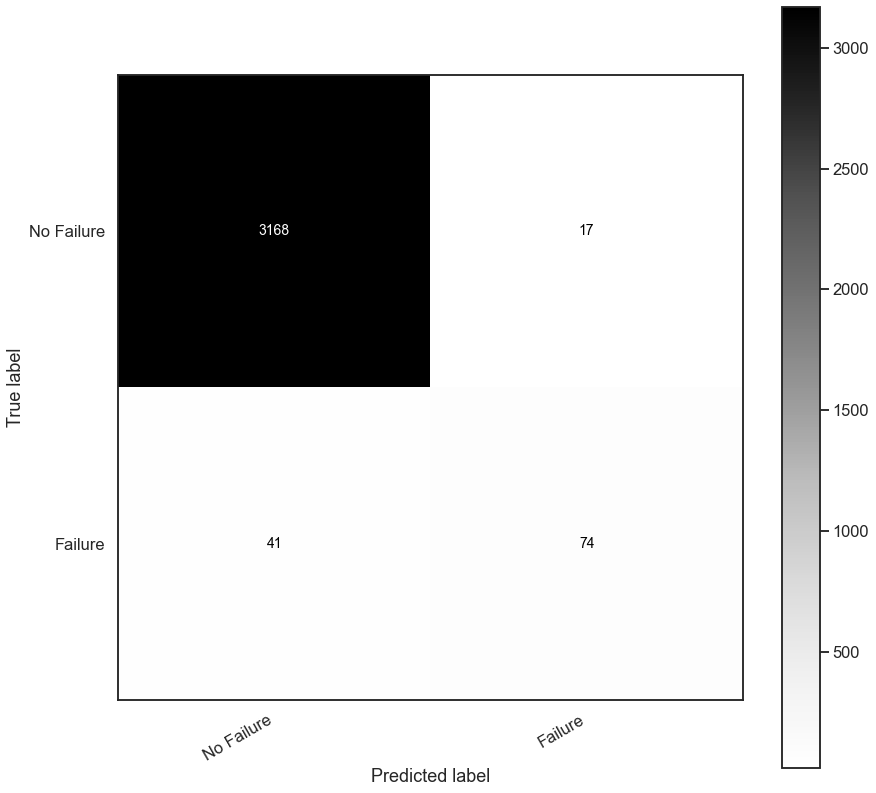

In [ ]:
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/adaboostmachinestatusPM.png') 

()

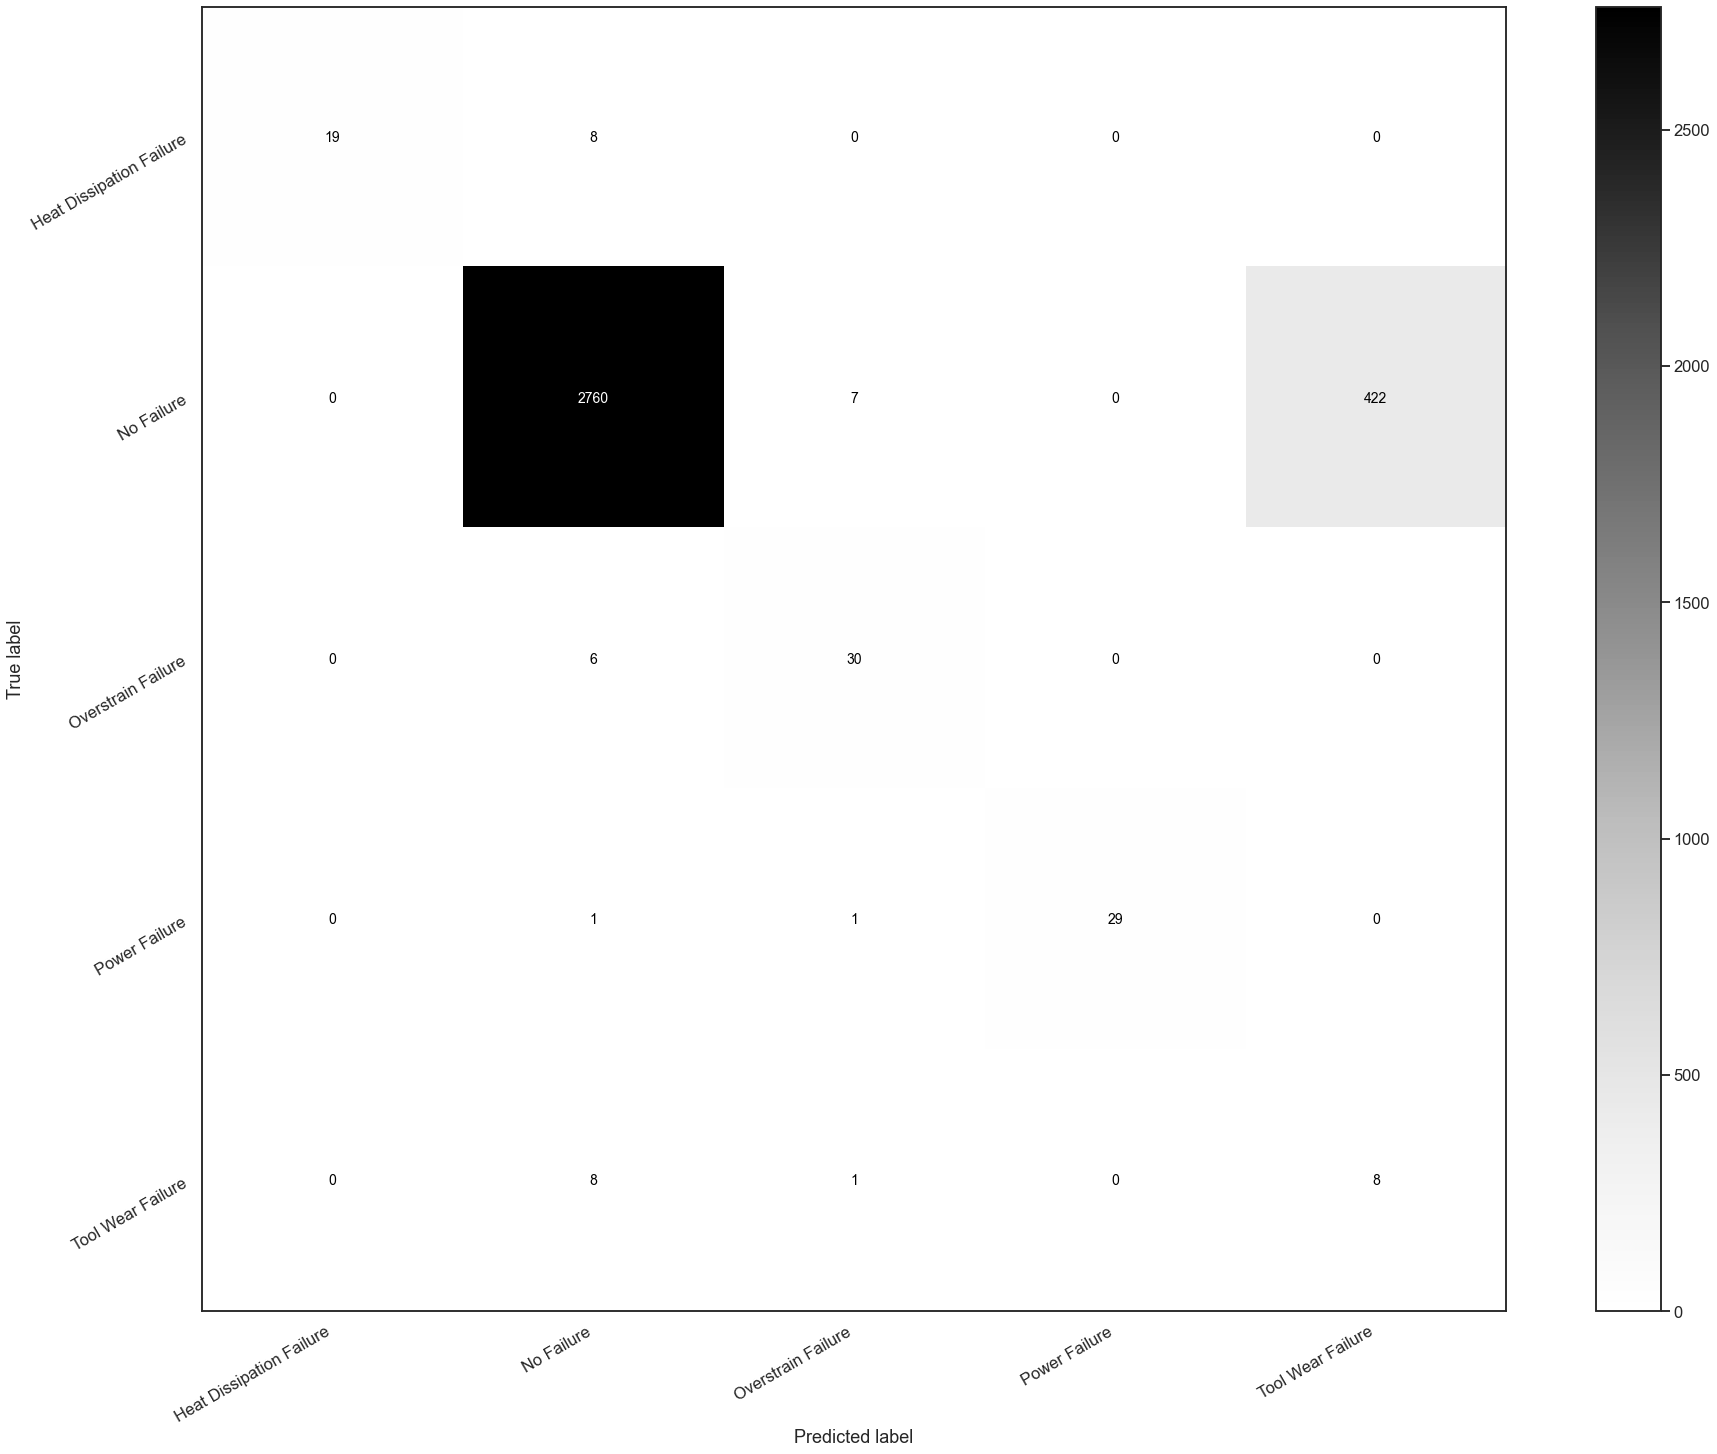

In [ ]:
confusion_failure_type(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/adaboostfailuretypePM.png') 

In [ ]:
# random forest classifier 
params_rf=grid_rfm_cv(split[2],split[4],'micro','poi')

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.7619   |  7.285    |  0.8338   |  110.5    |
|  2        |  0.7615   |  8.385    |  0.8591   |  90.44    |
|  3        |  0.595    |  3.157    |  0.884    |  96.71    |
|  4        |  0.7712   |  5.364    |  0.9981   |  96.64    |
|  5        |  0.595    |  3.568    |  0.9339   |  123.5    |
|  6        |  0.5996   |  4.92     |  0.8932   |  88.29    |
|  7        |  0.595    |  3.518    |  0.9802   |  135.6    |
|  8        |  0.7736   |  8.884    |  0.963    |  149.4    |
|  9        |  0.7642   |  7.041    |  0.9628   |  109.5    |
|  10       |  0.595    |  3.192    |  0.8908   |  87.37    |
|  11       |  0.7712   |  8.721    |  0.9395   |  119.6    |
|  12       |  0.5996   |  4.92     |  0.9997   |  89.66    |
|  13       |  0.7642   |  7.308    |  0.897    |  108.4    |
|  14       |  0.7689   |  8.095    |  0.8646   |  108.0    |
|  15   

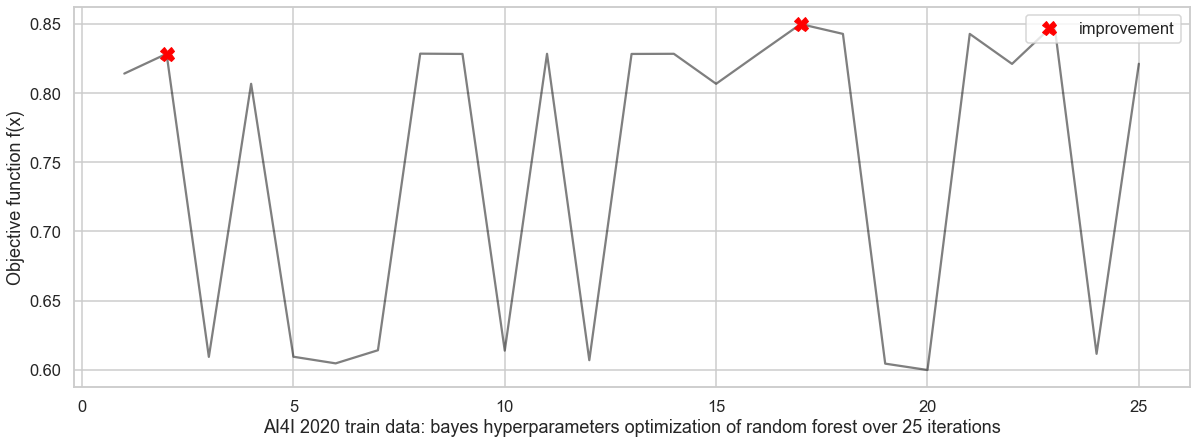

In [ ]:
# number of iterations
x=list(range(1,26))
# values of the objective function to be maximize 
y= [0.8142,0.8285,0.6093,0.8068,0.6094,0.6046,0.6141,0.8286,0.8284,0.6138,0.8285,0.6069,0.8284,0.8285,0.8068,0.8285,0.85,0.8429,0.6044,0.5998,0.8429,0.8212,0.85,0.6115,0.8213]
# plot 
sns.set_theme(style="whitegrid")
sns.set_context('talk')
_ = plt.figure(figsize=(20,7))
_=plt.plot(x,y, color='black',alpha=0.5)
_=plt.plot(2,0.8285,linestyle='none', marker='X', color='red', markersize=14)
_=plt.plot(17,0.85,linestyle='none', marker='X', color='red', markersize=14, label='improvement')
_ = plt.ylabel('Objective function f(x)')
_ = plt.xlabel('AI4I 2020 train data: bayes hyperparameters optimization of random forest over 25 iterations')
_=plt.legend(loc="upper right")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/bayesoptgridRF.png') 


In [ ]:
classifier = RandomForestClassifier(random_state=123,**params_rf)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  99.18 %
Test Recall (Failure Type)         :  99.18 %
Test F1-Score (Failure Type) :  99.18 %
Test Balanced Accuracy Score (Failure Type): 78.2 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  75.32 %
Test Recall (Failure Type)         :  78.2 %
Test F1-Score (Failure Type) :  76.67 %
Test Balanced Accuracy Score (Failure Type): 78.2 %
()


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  92.0 %
Test Recall (Machine Status)         :  80.0 %
Test F1-score (Machine Status) :  85.58 %
()


()

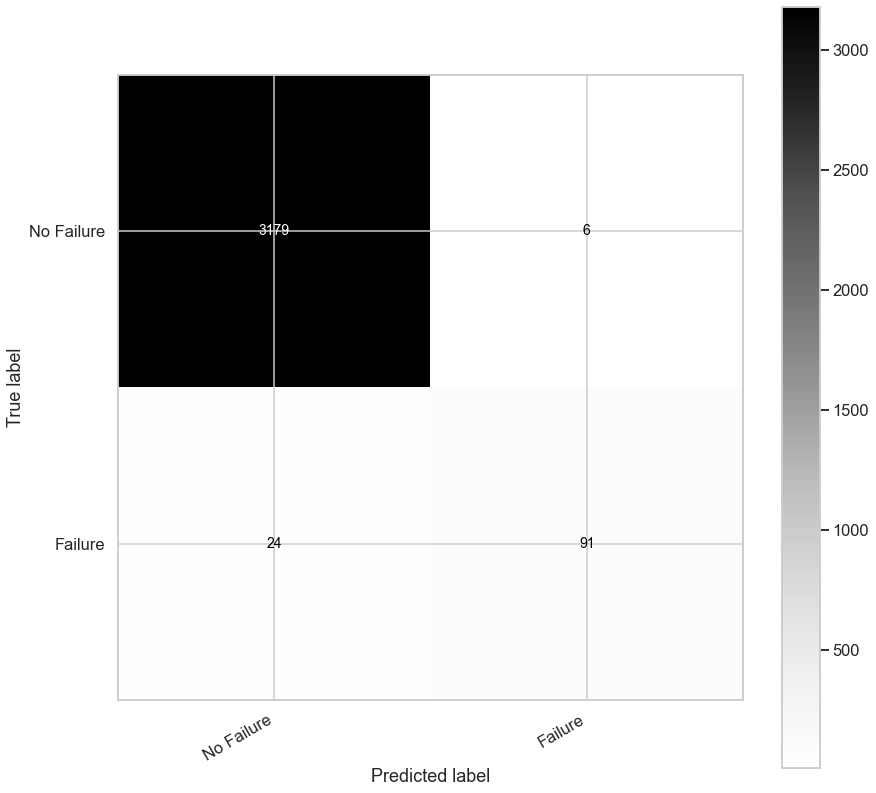

In [ ]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/randomforestmachinestatusPM.png') 

()

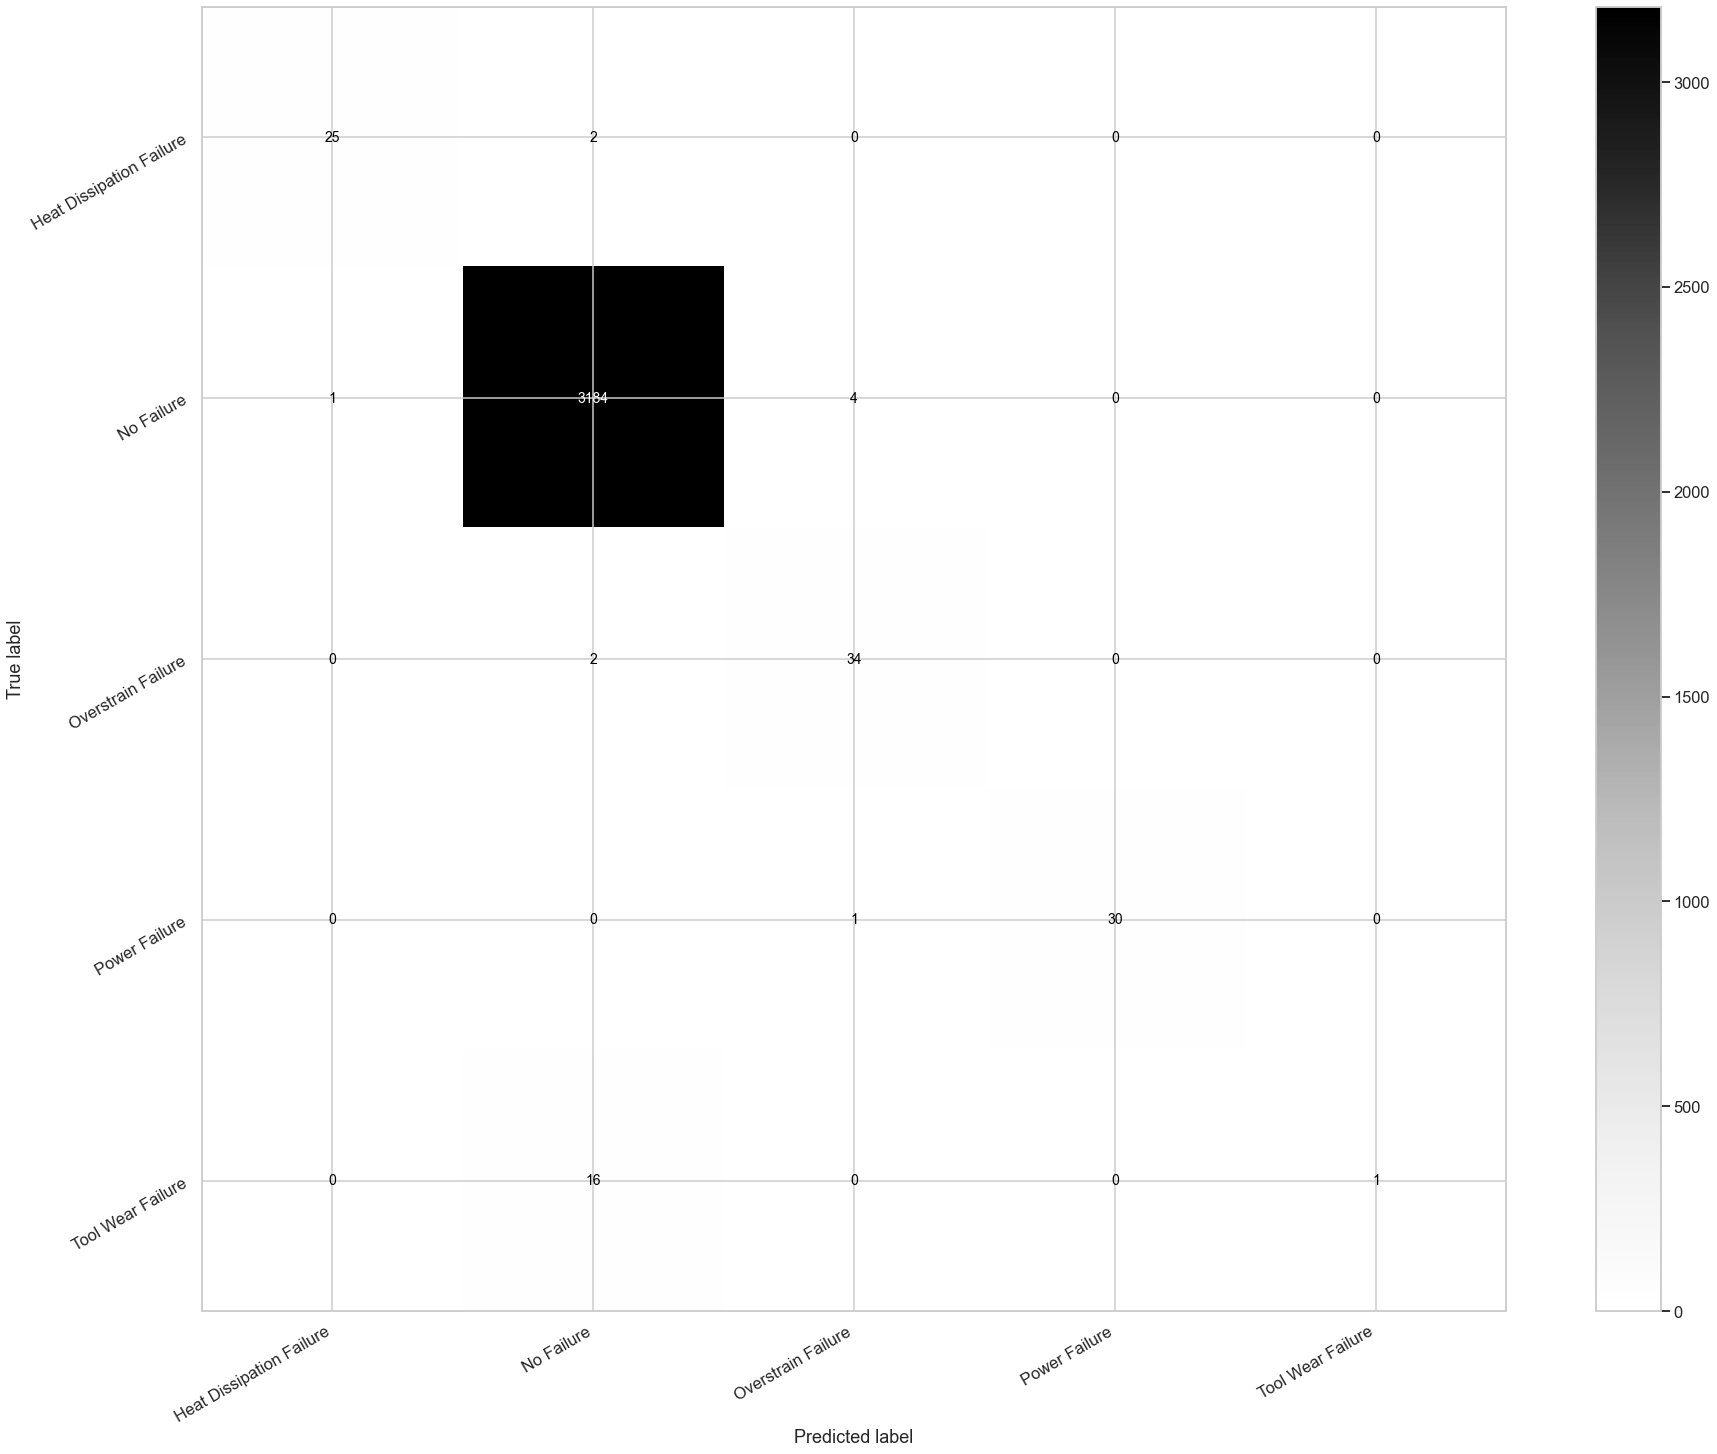

In [ ]:
confusion_failure_type(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/randomforestfailuretypePM.png')

In [ ]:
# mlp 
params_mlp=grid_nn_ef_cv(split[2],split[4],'micro','ei')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.6715   |  2.443    |  0.001699 |  64.84    |  1.531    |  0.883    |  1.015e+0 |  0.02248  |  12.94    |  0.7137   |  0.3343   |
|  2        |  0.6544   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  10.83    |  0.2211   |  0.8918   |
|  3        |  0.296    |  3.168    |  0.008407 |  107.3    |  1.972    |  1.726    |  1.081e+0 |  0.4213   |  10.19    |  1.358    |  0.1043   |
|  4        |  0.2      |  3.261    |  0.00698  |  79.31    |  0.5457   |  2.985    |  1.014e+0 |  0.6154   |  13.4     |  1.211    |  0.7206   |
|  5        |  0.3273   |  1.288    |  0.004011 |  51.72    |  1.885    |  2.747    |  1.081e+0 |  0.03408  |  16.6     |  2

In [ ]:
classifier = MLPClassifier(random_state=123,**params_mlp)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  99.12 %
Test Recall (Failure Type)         :  99.12 %
Test F1-Score (Failure Type) :  99.12 %
Test Balanced Accuracy Score (Failure Type): 74.89 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  75.8 %
Test Recall (Failure Type)         :  74.89 %
Test F1-Score (Failure Type) :  75.32 %
Test Balanced Accuracy Score (Failure Type): 74.89 %
()


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))


Test Precision (Machine Status)      :  88.64 %
Test Recall (Machine Status)         :  67.83 %
Test F1-score (Machine Status) :  76.85 %
()


()

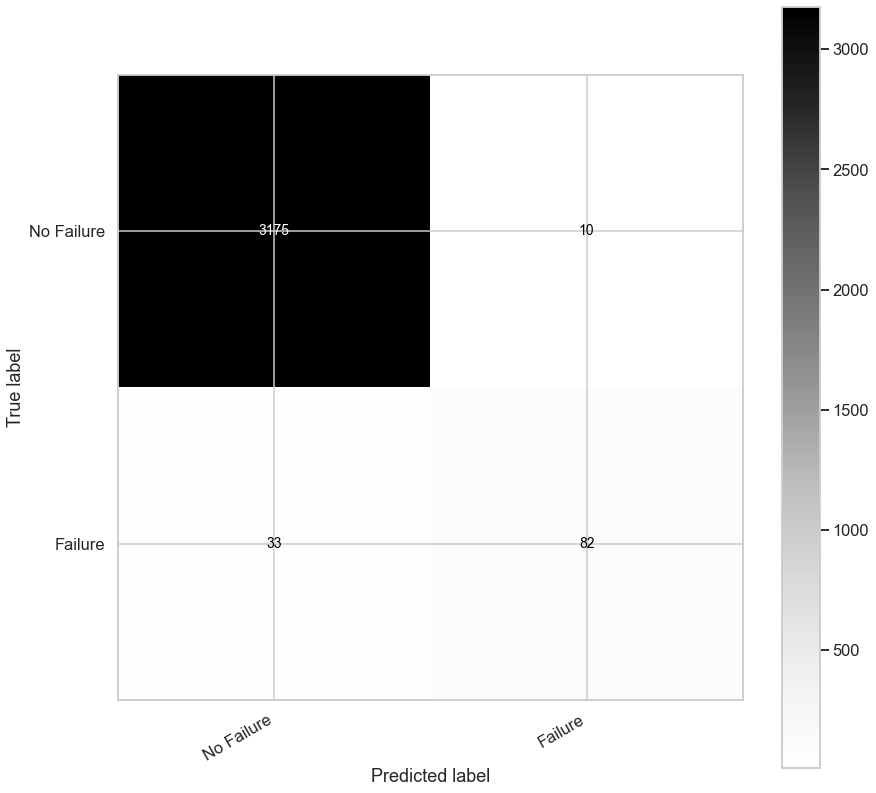

In [ ]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/nnmachinestatusPM.png')

()

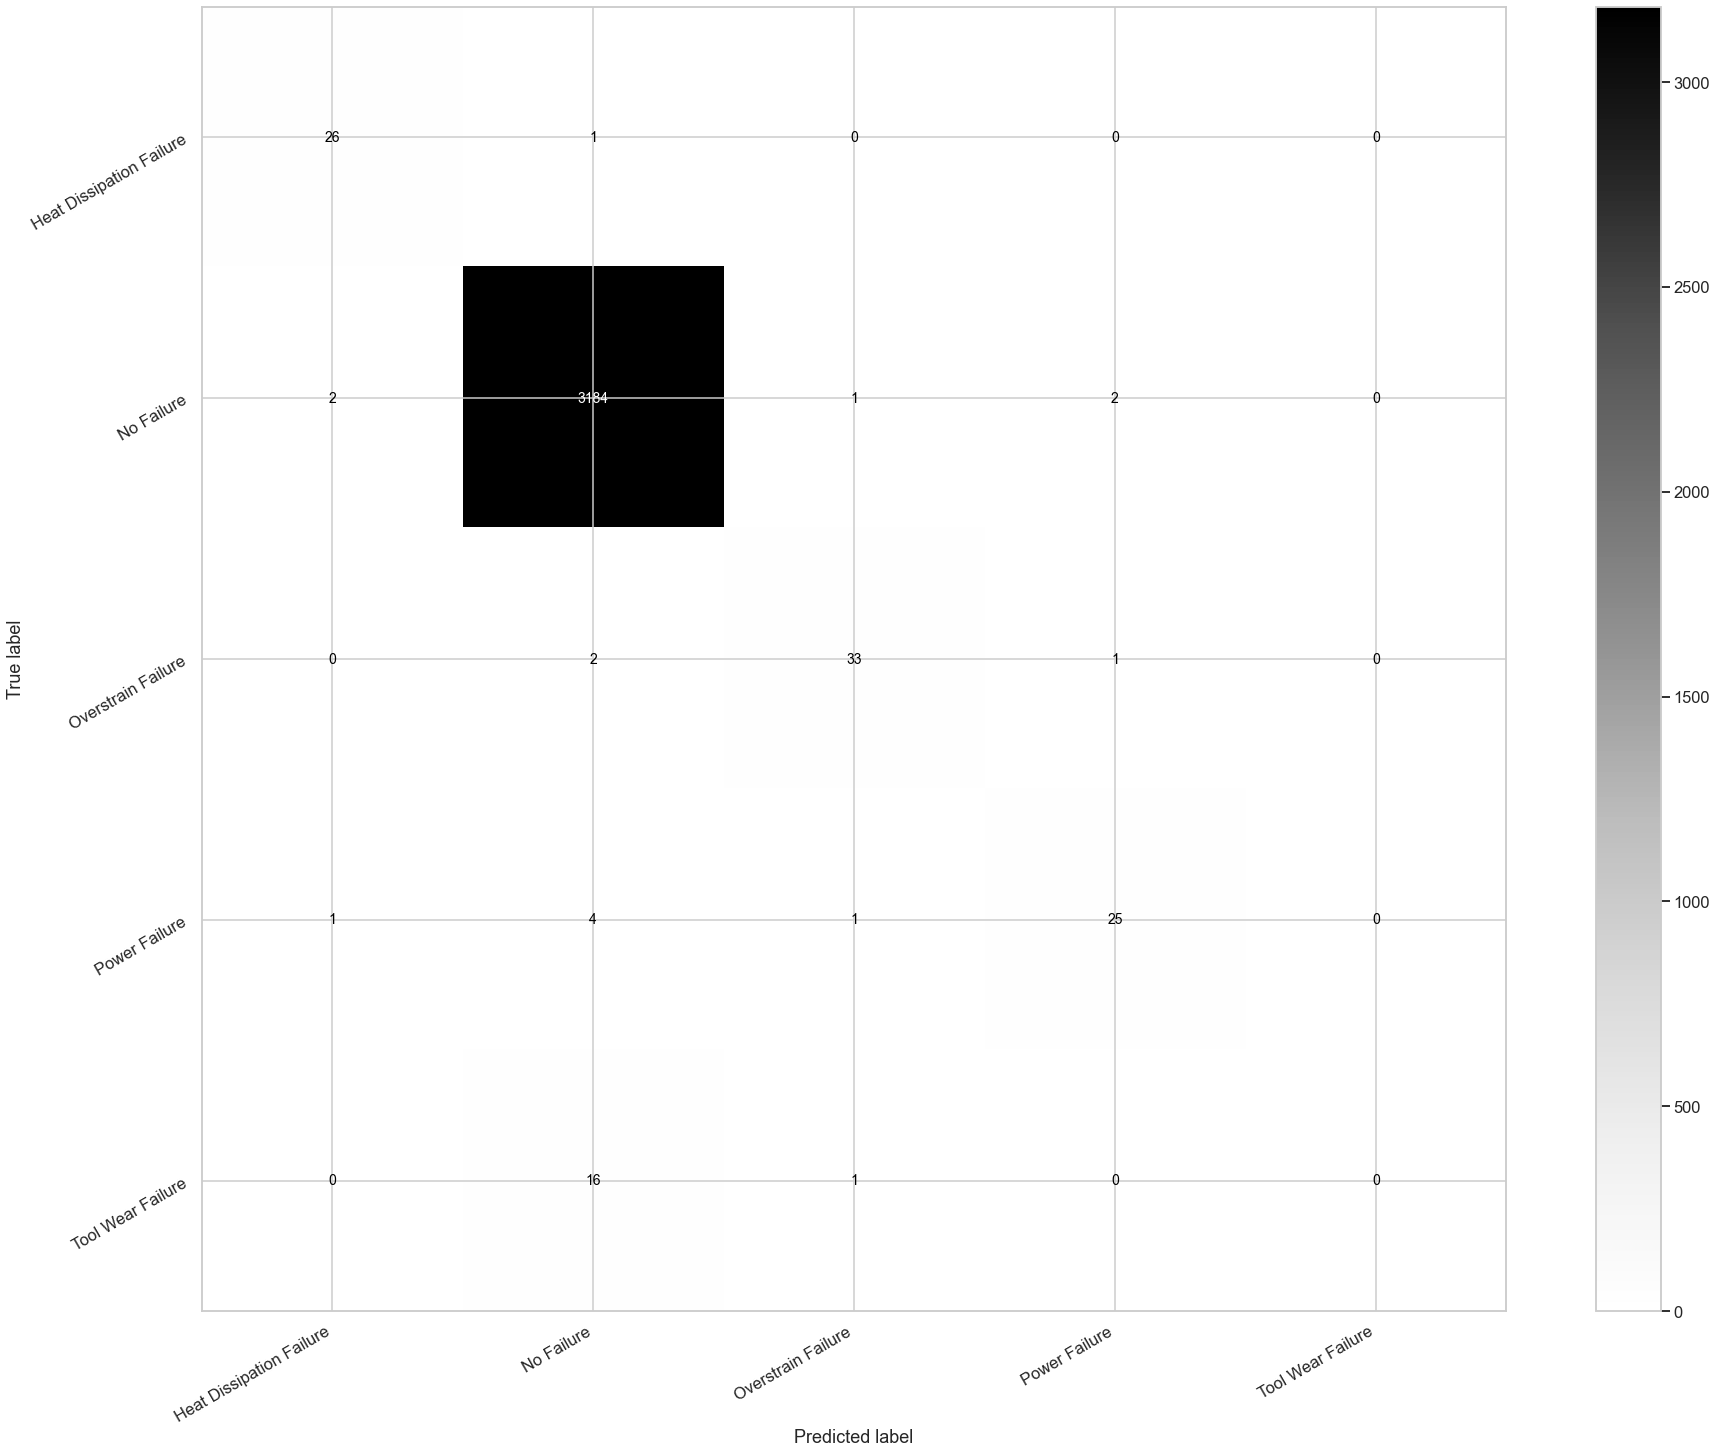

In [ ]:
confusion_failure_type(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesPM/nnfailuretypePM.png')